IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

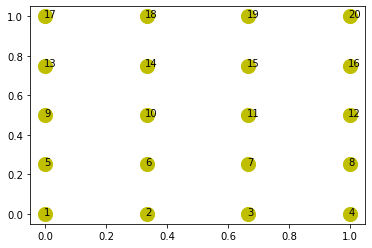

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import 

### Etape 1 : on defini notre geometrie
cas = 1
%run src\Cas_Test.ipynb

x = np;array([[0,0],
             [1,0],
             [1,2],
             [0,2]])

def uniform_mesh(d1,d2,p,m,elem_type) :
    
    PD = 2
    q = np.array([[0,0],[d1,0],[d1,d2],[0,d2]])
    
    NoN = (p+1)*(m+1)
    NoE = p*m
    NPE = 4
    
    NL = np.zeros([NoN,PD])
    
    a = (q[1,0] - q[0,0])/p
    b = (q[2,1] - q[0,1])/m
    
    n = 0
    
    for i in range(1,m+2):
        for j in range(1,p+2):
            NL[n,0] = q[0,0] + a*(j-1)
            NL[n,1] = q[0,1] + b*(i-1)
            n+=1
    
    EL = np.zeros([NoE,PD])
    
    for i in range(1,m+1):
        for j in range(1,p+1):
            if j == 1 :
                a= 0
            else : 
                a = 0

    return NL, EL

def Stiffness(x,GPE) : 
    NPE = np.size(x,0)
    PD = np.size(x,1)
    
    K = np.zeros([NPE*PD,NPE*PD])
    
    coor = x.T
    
    for i in range(1,NPE+1):
        for j in range(1,NPE+1):
            K = np.zeros([PD,PD])
            for gp in range(1,GPE+1):
                J = np.zeros([PD,PD]) #Jacobienne
                grad = np.zeros([PD,NPE])
                xi,eta,alpha = gauss_point(NPE,GPE,gp)
                grad_nat = grad_N_nat(NPE,xi,eta)
                J = coor @ grad_nat.T
                grad = np.linalg.inv(J).T @ grad_nat
                for a in range(1,PD+1):
                    for b in range(1,PD+1):
                        for c in range(1,PD+1):
                            for d in range(1,PD+1):
                                k[a-1,c-1] = k[a-1,c-1] + grad[b-1,i-1] * constitutive(a,b,c,d) * grad[d-1,j-1] * np.linalg.det(J) * alpha

d1, d2 = 1,1
p,m = 6,6
R = 0.2
elem_type = 'D2QU4N'

NL,EL = uniform_mesh(d1,d2,p,m,elem_type)

BC_flag = 'extension'

(ENL,DOFs,DOCs) = assign_BCs()
            
geom(NL)

### Sources 

* [1]: <https://www.youtube.com/watch?v=kIiVQirjvyo> Vidéo modélisation FEM 2D - Mesh 2D
* [2]: <https://www.youtube.com/watch?v=Ey2C_6eYyc4> Vidéo modélisation FEM 2D - Stiffness
* [3]: <https://www.youtube.com/watch?v=5wNrMYjPDjc> Vidéo modélisation FEM 2D - Calcul
* [4]: <https://www.youtube.com/watch?v=yVue3U0FFKQ> Vidéo modélisation FEM 2D - Post
* [5]: <https://www.youtube.com/watch?v=TusCNRUfDPw> Vidéo modélisation plaque flechissante

### Références 

[1] [Problemes with FEM modelisation](https://www.fidelisfea.com/post/hourglassing-and-shear-locking-what-is-it-and-why-does-it-matter)
- https://www.quora.com/What-is-the-hourglass-effect-in-finite-element-analysis-How-does-the-reduced-integration-resulting-in-the-hourglass-effect-work-How-can-we-counter-the-hourglass-effect

[2] [Non linearity with Newton Raphson methd in FEM](https://www.youtube.com/watch?v=uXvoN4OleeE)

In [ ]:
def gauss_point(NPE,GPE,gp):
    if NPE == 4 : 
        if GPE == 1 :
            if gp == 1 :
                xi = 0
                eta = 0
                alpha = 4
        elif GPE == 4 :
            if gp == 1 :
                xi = -1/np.sqrt(3)
                eta = -1/np.sqrt(3)
                alpha = 1
            elif gp == 2 :
                xi = 1/np.sqrt(3)
                eta = -1/np.sqrt(3)
                alpha = 1
            elif gp == 3 :
                xi = 1/np.sqrt(3)
                eta = 1/np.sqrt(3)
                alpha = 1
            elif gp == 4 :
                xi = -1/np.sqrt(3)
                eta = 1/np.sqrt(3)
                alpha = 1
    return xi,eta,alpha

def grad_N_nat(NPE,xi,eta):
    PD = 2 
    result = np.zeros([PD,NPE])
    
    if NPE == 3 : # For triangle element
        result[0,0] = 1
        result[0,1] = 0
        result[0,2] = -1
        
        result[1,0] = 0
        result[1,1] = 1
        result[2,1] = -1
    
    if NPE == 4 : # For quadrangle element
        result[0,0] = -1/4*(1-eta)
        result[0,1] = 1/4*(1-eta)
        result[0,2] = 1/4*(1+eta)
        result[0,3] = -1/4*(1+eta)
        
        result[1,0] = -1/4*(1-xi)
        result[2,1] = -1/4*(1+xi)
        result[3,1] = 1/4*(1+xi)
        result[4,3] = 1/4*(1-xi)
    return result

def constitutive(i,j,k,l):
    E= 8/3
    nu = 1/3
    
    C = E/(2*(1+nu))*(delta(i,l)*delta(j,k) + delta(i,k)*delta(j,l) (E*nu)/(1-nu**2)*delta(k,l)
    
    return C

def delta(i,j):
    if i == j : 
        delta = 1 
    else : 
        delta = 0
    return delta